<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Airport_Connections_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airport Connections (Very Hard)

For the purpose of this question, the phrases "airport route" and "airport connection" are used interchangeably.

You're given a list of airports (three-letter codes like `"JFK"`), a list of routes (one-way flights from one airport to another like `["JFK", "SFO"]`), and a starting airport.

Write a function that returns the minimum number of airport connections (one-way flights) that need to be added in order for someone to be able to reach any airport in the list, starting at the starting airport.

Note that routes only allow you to fly in one direction; for instance, the route `["JFK", "SFO"]` only allows you to fly from `"JFK"` to `"SFO"`.

Also note that the connections don't have to be direct; it's okay if an airport can only be reached from the starting airport by stopping at other airports first.

Sample Input

```
airports = [
  "BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN",
  "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD",
]

routes = [
  ["DSM", "ORD"],
  ["ORD", "BGI"],
  ["BGI", "LGA"],
  ["SIN", "CDG"],
  ["CDG", "SIN"],
  ["CDG", "BUD"],
  ["DEL", "DOH"],
  ["DEL", "CDG"],
  ["TLV", "DEL"],
  ["EWR", "HND"],
  ["HND", "ICN"],
  ["HND", "JFK"],
  ["ICN", "JFK"],
  ["JFK", "LGA"],
  ["EYW", "LHR"],
  ["LHR", "SFO"],
  ["SFO", "SAN"],
  ["SFO", "DSM"],
  ["SAN", "EYW"],
]

startingAirport = "LGA"
```



Sample Output

```
3 // ["LGA", "TLV"], ["LGA", "SFO"], and ["LGA", "EWR"]
```



## Solution 1 (DFS to identify types of route chain and count as approprate)

In [ ]:
airports = [
  "BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN",
  "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD",
]

routes = [
  ["DSM", "ORD"],
  ["ORD", "BGI"],
  ["BGI", "LGA"],
  ["SIN", "CDG"],
  ["CDG", "SIN"],
  ["CDG", "BUD"],
  ["DEL", "DOH"],
  ["DEL", "CDG"],
  ["TLV", "DEL"],
  ["EWR", "HND"],
  ["HND", "ICN"],
  ["HND", "JFK"],
  ["ICN", "JFK"],
  ["JFK", "LGA"],
  ["EYW", "LHR"],
  ["LHR", "SFO"],
  ["SFO", "SAN"],
  ["SFO", "DSM"],
  ["SAN", "EYW"],
]

startingAirport = "LGA"

In [ ]:
# time O(R+A)
# space O(R+A)
# A = no. of airport
# R = no. of route

def airportConnections(airports, routes, startingAirport, report=False):
  # pre-process routes = {start: ['end1', 'end2']}
  routes_hashtable = {}
  reversed_routes_hashtable = {}
  in_degree = {}
  required_connection = 0
  for route in routes:
    if route[0] not in routes_hashtable:
      routes_hashtable[route[0]] = [route[1]]
    else:
      routes_hashtable[route[0]].append(route[1])

    if route[1] not in reversed_routes_hashtable:
      reversed_routes_hashtable[route[1]] = [route[0]]
    else:
      reversed_routes_hashtable[route[1]].append(route[0])

    in_degree[route[1]] = True
  
  visited_airport = {}
  if report: print('airport chain')
  for airport in airports:
    if airport not in in_degree:
      airport_chain, visited_airport, contain_starting_airport = graph_traversal(airport, routes_hashtable, visited_airport, startingAirport)
      if report: print(airport_chain)
      
      if startingAirport != airport_chain[0] and len(airport_chain) > 0:
        required_connection += 1

  if report: print('airport cycle')
  for airport in airports:
    if airport not in visited_airport:
      airport_chain, visited_airport, contain_starting_airport = graph_traversal(airport, routes_hashtable, visited_airport, startingAirport, reversed_routes_hashtable)
      if report: print(airport_chain)
      if not contain_starting_airport and len(airport_chain) > 0:
        if startingAirport not in airport_chain:
          required_connection += 1
        else:
          # check cycle
          cycle = graph_traversal(startingAirport, routes_hashtable, {}, startingAirport, check_cycle = True)
          if not cycle: 
            required_connection += 1

  return required_connection
      

def graph_traversal(airport, routes_hashtable, visited_airport, startingAirport, reversed_routes_hashtable=None, check_cycle = False):
  # init fringe
  fringe = [airport]
  airport_chain = []
  contain_starting_airport = False
  cycle = False

  while True:
    # is fringe empty?
    if fringe == []:
      if check_cycle:
        return cycle
      else:
        return airport_chain, visited_airport, contain_starting_airport

    # remove front
    front = fringe.pop()
    if front in visited_airport: continue
    visited_airport[front] = True
    airport_chain.append(front)
    if front == startingAirport:
      contain_starting_airport = True
    if check_cycle == True:
      for target in routes_hashtable[front]:
        if target in airport_chain:
          cycle = True

    # gen & insert successor
    if front in routes_hashtable:
      successor = routes_hashtable[front]
      fringe = fringe + successor
    
    if reversed_routes_hashtable != None and front in reversed_routes_hashtable:
      successor = reversed_routes_hashtable[front]
      fringe = fringe + successor

In [ ]:
print(airportConnections(airports, routes, startingAirport, False))

3


In [ ]:
print(airportConnections(airports, routes, startingAirport, True))

airport chain
['EWR', 'HND', 'JFK', 'LGA', 'ICN']
['TLV', 'DEL', 'CDG', 'BUD', 'SIN', 'DOH']
airport cycle
['BGI', 'ORD', 'DSM', 'SFO', 'LHR', 'EYW', 'SAN']
3


### Conceptual Note

The algorithm is basically try to identify diff type of airport chain and count the airport chain for the no. of required connection as shown in the picture below.

In some case, we will not count the airport chain as shown in the picture below.

First, we will iterate for chain-types (start with airport with no in degree)

Second, we will iterate all remaining airport to identify cycle-type airport chain. Note: that we have to backward traverse as well to identify whole element in this type. We also have to idenify whether we have starting airport on the leaf of the cycle or not in order to correctly count the required connection.

Time complexity: O(A+R) 
- R because we iterate through route to generate graph as dictionary
- A for airport traversal and we will not traverse visited airport. However, we will have to traverse to visited airport for the cycle-type airport chain that have starting node to identify wheter our starting node is on cycle or leaf but that will be only O(A) anyway because we will do in only one time atmost (only one starting airport)

Space complexity: O(A + R). A for property of airport like visited, in_degree and R for graph as dictionary.



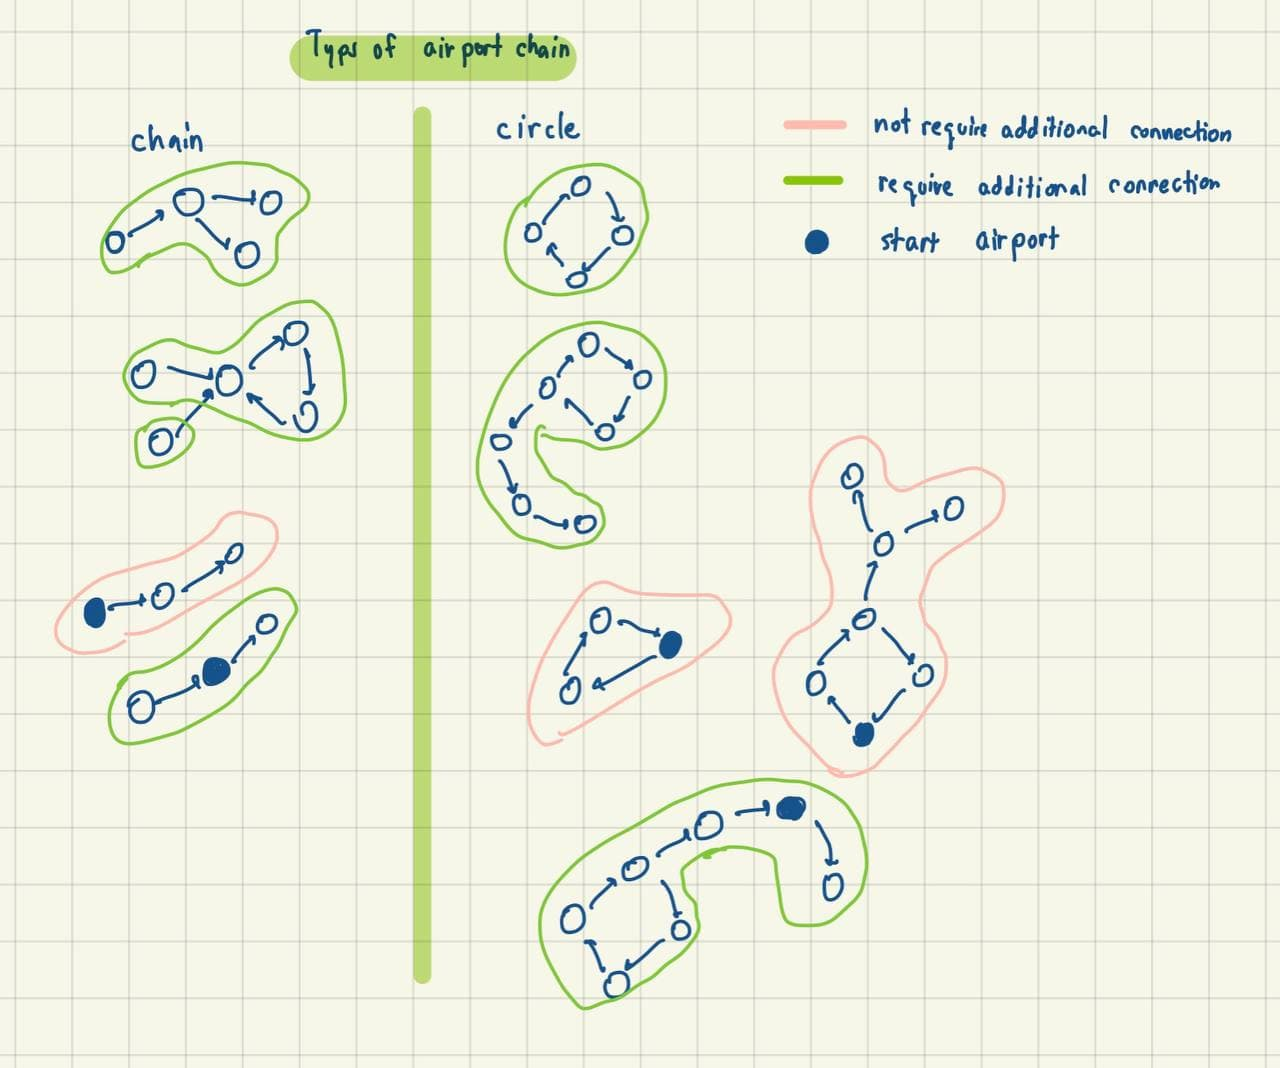

## Solution 2 (Identify Strongly Connected Component and count)

In [ ]:
airports = [
  "BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN",
  "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD",
]

routes = [
  ["DSM", "ORD"],
  ["ORD", "BGI"],
  ["BGI", "LGA"],
  ["SIN", "CDG"],
  ["CDG", "SIN"],
  ["CDG", "BUD"],
  ["DEL", "DOH"],
  ["DEL", "CDG"],
  ["TLV", "DEL"],
  ["EWR", "HND"],
  ["HND", "ICN"],
  ["HND", "JFK"],
  ["ICN", "JFK"],
  ["JFK", "LGA"],
  ["EYW", "LHR"],
  ["LHR", "SFO"],
  ["SFO", "SAN"],
  ["SFO", "DSM"],
  ["SAN", "EYW"],
]

startingAirport = "LGA"

In [ ]:
# time O(V+E), space O(V+E)
def airportConnections(airports, routes, startingAirport):
  # time O(E), space O(E)
  adjacency_list = create_adjacency_list(routes)

  # time O(V+E), space O(V+E)
  scc = scc_identifier(airports, adjacency_list, startingAirport)

  # time O(V+E), space O(V+E)
  condensed_edge_list, condensed_nodes = condense_graph(routes, scc, startingAirport)

  # time O(E), space O(E)
  condensed_adjacency_list = create_adjacency_list(condensed_edge_list)

  # time O(V), space O(E)
  no_indegree = no_indegree_finder(condensed_nodes, condensed_adjacency_list, set([startingAirport]))
  return len(no_indegree)

def scc_identifier(airports, adjacency_list, startingAirport):
  # Tarjan's Algorithm to identify stongly connected components (SCCs).
  visited_node = set()
  processing_lowlink = {} # {node:lowlink}
  scc = {} # {lowlink1:[node1, node2], lowlink2:[node3, node4]}
  dfs_state = {'running node id':0}
  
  for airport in airports:
    if airport not in visited_node:
      dfs_scc(airport, adjacency_list, startingAirport, visited_node, processing_lowlink, dfs_state, scc)
  
  return scc

def dfs_scc(airport, adjacency_list, startingAirport, visited_node, processing_lowlink, dfs_state, scc):
  if airport in visited_node:
    return None
  if airport in processing_lowlink:
    lowlink = processing_lowlink[airport]
    return lowlink
  
  processing_lowlink[airport] = dfs_state['running node id']
  dfs_state['running node id'] += 1
  if airport in adjacency_list:
    for target in adjacency_list[airport]:
      lowlink = dfs_scc(target, adjacency_list, startingAirport, visited_node, processing_lowlink, dfs_state, scc)
      if lowlink != None:
        processing_lowlink[airport] = min(lowlink, processing_lowlink[airport])

  if processing_lowlink[airport] not in scc:
    scc[processing_lowlink[airport]] = []
  scc[processing_lowlink[airport]].append(airport)
  visited_node.add(airport)
  return processing_lowlink[airport]

def condense_graph(routes, scc, startingAirport):
  scc_name = {}
  for lowlink, airports in scc.items():
    name = airports[0]
    for airport in airports:
      if airport == startingAirport:
        name = startingAirport
    scc_name[name] = airports

  condensed_nodes = scc_name.keys()
  reversed_scc_name = {i:k for k, v in scc_name.items() for i in v}
  
  condensed_edge_list = []
  for route in routes:
    start, end = route
    condensed_start, condensed_end = reversed_scc_name[start], reversed_scc_name[end]
    if reversed_scc_name[start] != reversed_scc_name[end]:
      condensed_edge_list.append([reversed_scc_name[start], reversed_scc_name[end]])
  
  return condensed_edge_list, condensed_nodes

def no_indegree_finder(nodes, adjacency_list, excluded_nodes=set()):
  reversed_adjacency_list = {i:k for k, v in adjacency_list.items() for i in v}
  no_indegree = []
  for node in nodes:
    if node not in reversed_adjacency_list and node not in excluded_nodes:
      no_indegree.append(node)
  
  return no_indegree

def create_adjacency_list(routes):
  adjacency_list = {}
  for route in routes:
    start, end = route
    if start not in adjacency_list:
      adjacency_list[start] = []
    adjacency_list[start].append(end)

  return adjacency_list

In [ ]:
print(airportConnections(airports, routes, startingAirport))

3


In [ ]:
airports = ["BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN", "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD"]
routes = []
startingAirport = "LGA"

In [ ]:
print(airportConnections(airports, routes, startingAirport))

17


### Conceptual Note

1. Apply Tarjan's algorithm to identify strongly connected components (SCCs) in the graph 
2. count SCC that have no in-degree excluding SCC that contain starting airport
3. the counte will be the minimum required no. of routes from starting airport to travel to all the node in the graph.

Tarjan's algorithms detail: https://www.youtube.com/watch?v=TyWtx7q2D7Y

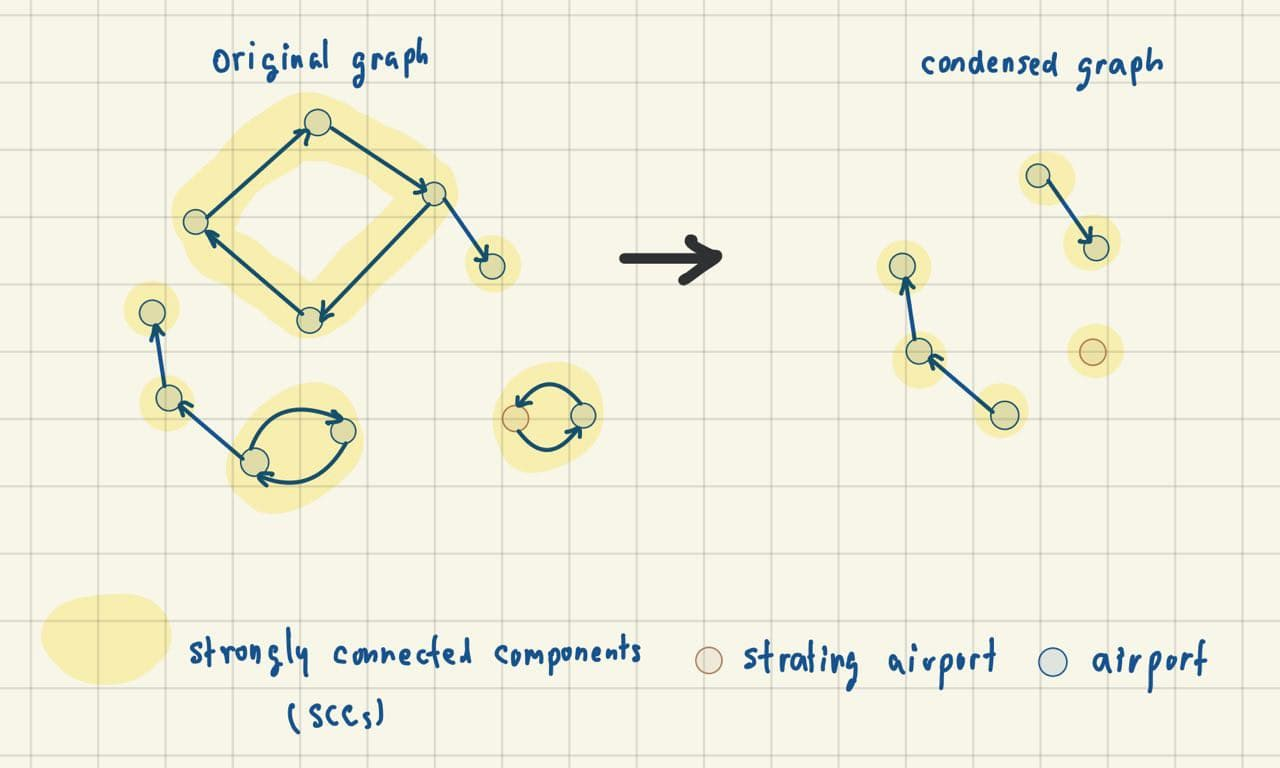